# Régression linéaire simple 

## Un exemple simple 

In [1]:
#géneration des données de l'exemple
import numpy as np
X=np.array([0,3,6,8])
Y=np.array([35,45,65,80])

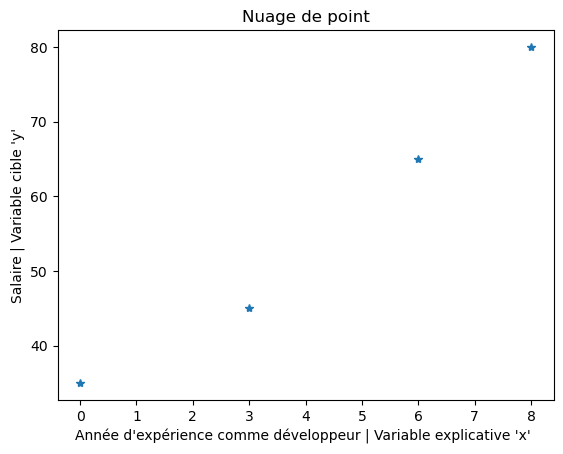

In [2]:
import matplotlib.pyplot as plt 
plt.plot(X,Y,'*')
plt.xlabel("Année d'expérience comme développeur | Variable explicative 'x' ")
plt.ylabel("Salaire | Variable cible 'y'")
plt.title("Nuage de point")
plt.savefig("./intuitive_scatter.png")

In [3]:
def reg_plot(x,y,m):
    plt.scatter(x,y,c='blue',label="les données")
    plt.plot(x, m.predict(x.reshape(-1, 1)), color='red',label="droite de prédiction")
    plt.xlabel("Variable explicative 'x' ")
    plt.ylabel("Variable cible 'y'")
    plt.legend()
    return None 

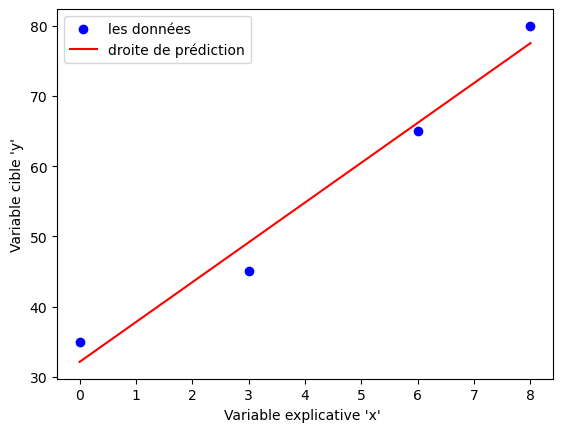

In [4]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X.reshape(-1, 1),Y)
reg_plot(X,Y,linear_model)
plt.savefig("./approche_intuitive.png")

## Un exemple avec plus de données 

On génère des données linéaires pour notre exemple avec la librairie numpy et les fonctions :  
- `arange()`: https://numpy.org/doc/stable/reference/generated/numpy.arange.html 
- `random.uniform()` : https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html 

In [5]:
import numpy as np 
x=np.arange(75)
delta = np.random.uniform(-10,10, size=(75,))
y = 0.4 * x +3 + delta

visualisation rapide des données avec la fonction `plot()` de  la librairie matplotlib

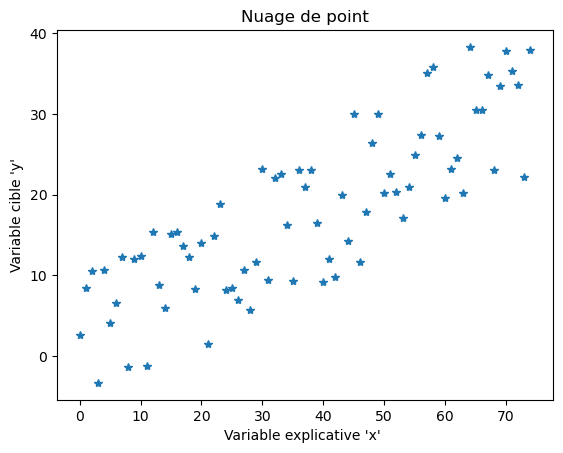

In [6]:
plt.plot(x,y,"*")
plt.xlabel("Variable explicative 'x' ")
plt.ylabel("Variable cible 'y'")
plt.title("Nuage de point")
plt.savefig("./intuitive_scatter_bis.png")

## Utilisation de la librairie `scikit-learn`
On importe la librairie scikit-learn afin d'aller chercher l'algorithme de régression sous forme d'une fonction. 

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
linear_model = LinearRegression()

In [9]:
linear_model.fit(x.reshape(-1, 1),y)

LinearRegression()

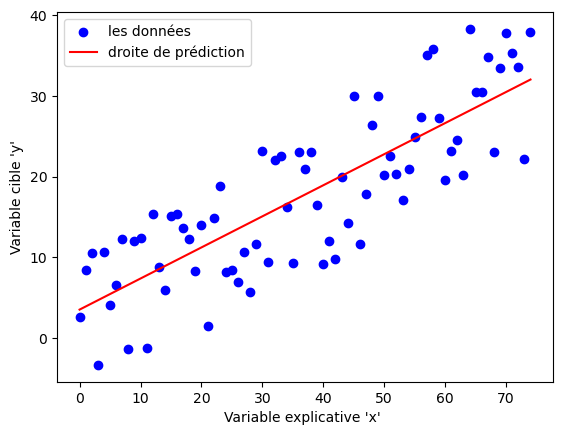

In [10]:
reg_plot(x,y,linear_model)
plt.savefig("./prediction.png")

# Cas pratique : prediction du salaire en fonction des années d'expérience

Importer la librairie pandas, les data et afficher le début du Dataframe : 

In [13]:
import pandas as pd 
df = pd.read_csv("../BaseDonnee/salary.dat",delim_whitespace=True)
df.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


On selectionne la variable a predire et de la variable explicative avec un masque Pandas de la façon suivante : 

In [14]:
df=df[["yr","sl"]]

On va maintenant afficher le nuage de point afin de voir si cela peut avoir du sens de corréler ces deux variables 

Text(0.5, 1.0, "Salaire en fonction des années d'expérience")

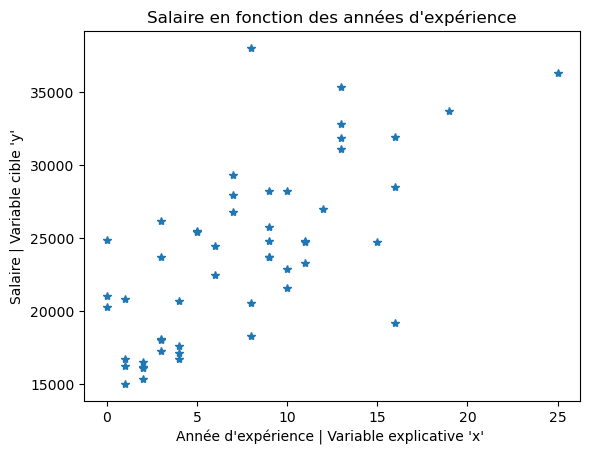

In [15]:
X=df.yr
Y=df.sl
plt.plot(X,Y,'*')
plt.xlabel("Année d'expérience | Variable explicative 'x' ")
plt.ylabel("Salaire | Variable cible 'y'")
plt.title("Salaire en fonction des années d'expérience")

On importe maintenant l'estimateur LinearRegression pour faire un fit sur nos données. 

🚧 Attention à ne pas oublier la méthode .reshape(-1, 1) car votre variable explicative est en une dimension 🚧

In [16]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [17]:
linear_model.fit(np.array(X).reshape(-1, 1),np.array(Y))

LinearRegression()

Enfin on utilise la fonction reg_plot pour afficher notre droite de prédiction tel que : 

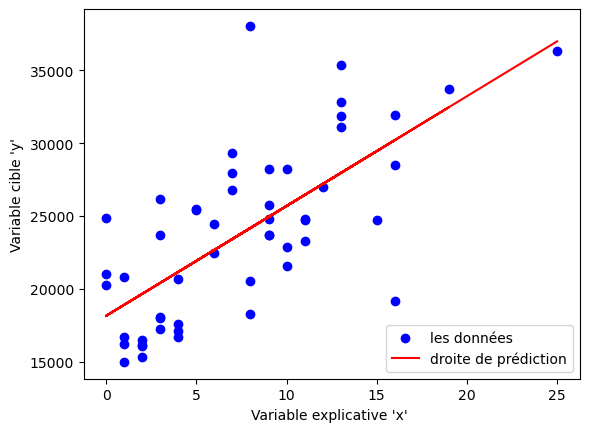

In [18]:
reg_plot(np.array(X),np.array(Y),linear_model)

Puis les différents score : 

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
Y_pred = linear_model.predict(np.array(X).reshape(-1, 1))
print("Mean squared error: %.2f"
      % mean_squared_error(Y, Y_pred))
print("Root mean squared error: %.2f"
      % np.sqrt(mean_squared_error(Y, Y_pred)))
print("R square: %.2f"% r2_score(Y, Y_pred))

Mean squared error: 17481710.59
Root mean squared error: 4181.11
R square: 0.49
